<a href="https://colab.research.google.com/github/ipshitaRB/Analyzing-CIA-Factbook-data/blob/master/Analyzing_CIA_Factbook_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# import required libraries
import pandas as pd
import sqlite3 

In [0]:
# connect to factbook.db
conn = sqlite3.connect("/content/drive/My Drive/Data Science /Data/CIA Factbook/factbook.db")


In [4]:
query = "SELECT * FROM facts;"
facts_df = pd.read_sql_query(query, conn)

# check data
facts_df.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Find minimum and maximum population and population growth 

In [5]:
# query for summary statistics of population and population growth
min_max_query = "select min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth from facts"
pd.read_sql_query(min_max_query, conn)


,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


## Find the countrie(s) with highest and lowest population

In [6]:
highest_population_country = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)"
pd.read_sql_query(highest_population_country, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [7]:
lowest_population_country = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts)"
pd.read_sql_query(lowest_population_country, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


## Generate Histograms for population, population growth, birth rate and death rate


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f033db06a58>,
      dtype=object)

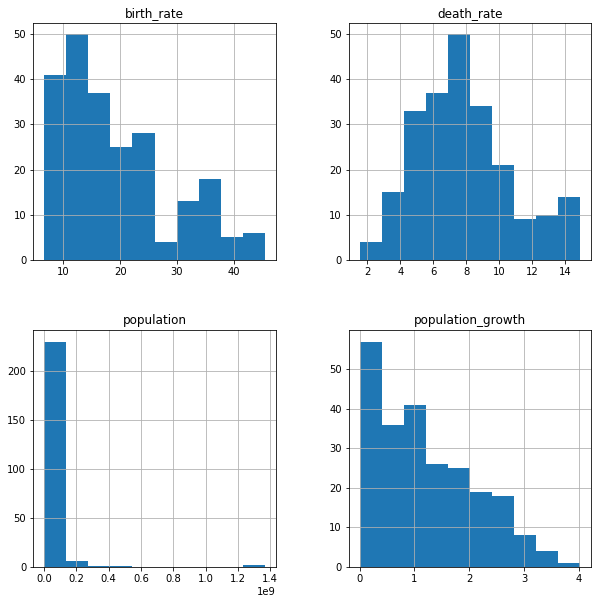

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

As shown, around over 200 countries hace population under 100 million.Most countries also have population growth rate under 1%